In [1]:
from obspy import read
from obspy.signal.trigger import ar_pick
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
st1 = read('data/earthquake/st1.SAC')
st2 = read('data/earthquake/st2.SAC')
st3 = read('data/earthquake/st3.SAC')

threechannels = read('data/earthquake/st1.SAC')
threechannels += read('data/earthquake/st2.SAC')
threechannels += read('data/earthquake/st3.SAC')

In [3]:
#threechannels.plot()

In [4]:
Mt = np.sqrt(st1[0].data**2+st2[0].data**2+st3[0].data**2)

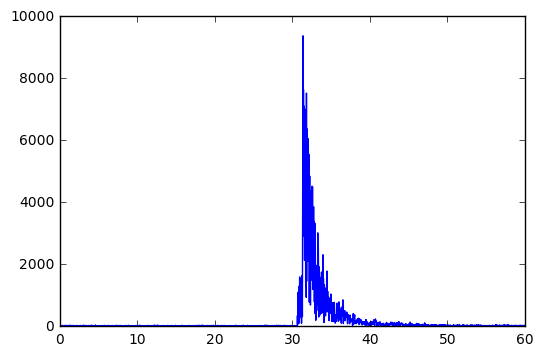

In [5]:
sampling_rate = 1/st1[0].stats.sampling_rate
number_of_samples = st1[0].stats.npts
t = np.arange(0,sampling_rate*number_of_samples,sampling_rate)

plt.plot(t,Mt)

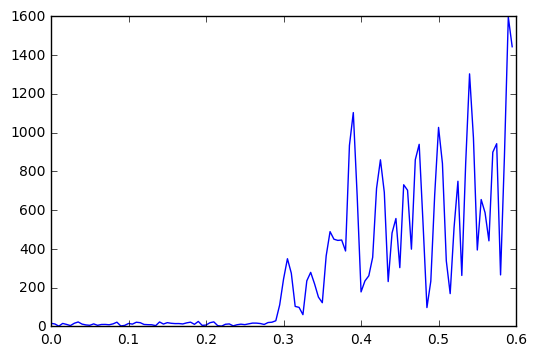

In [6]:
t2 = np.arange(0,sampling_rate*120,sampling_rate)
plt.plot(t2,Mt[6068:6188])

In [7]:
#Axx = (2 / (np.max(tr1.data)-np.min(tr1.data))*(tr1.data-np.max(tr1.data)))+ 1
#Ayy = (2 / (np.max(tr2.data)-np.min(tr2.data))*(tr2.data-np.max(tr2.data)))+ 1
#Azz = (2 / (np.max(tr3.data)-np.min(tr3.data))*(tr3-np.max(tr3.data)))+ 1

In [8]:
#p at [6068:6188]
#pmid at [6125:6135]
#s [6180:6300]
#smid at [6235:6245]

In [9]:
x = st1[0].data
y = st2[0].data
z = st3[0].data

In [10]:
x
z

array([ 14.,  11., -18., ...,  12.,   2.,   0.], dtype=float32)

In [11]:
t3 = np.arange(0,number_of_samples*0.005,0.05)
t3

array([  0.00000000e+00,   5.00000000e-02,   1.00000000e-01, ...,
         5.98500000e+01,   5.99000000e+01,   5.99500000e+01])

In [19]:
window = 10

rec = []
for i in range(0,number_of_samples,window):
    C11=((x[i:i+window]-x[i:i+window].mean()) * (x[i:i+window]-x[i:i+window].mean())).sum(0) / window
    C12=((x[i:i+window]-x[i:i+window].mean()) * (y[i:i+window]-y[i:i+window].mean())).sum(0) / window
    C13=((x[i:i+window]-x[i:i+window].mean()) * (z[i:i+window]-z[i:i+window].mean())).sum(0) / window
    C21=C12
    C22=((y[i:i+window]-y[i:i+window].mean()) * (y[i:i+window]-y[i:i+window].mean())).sum(0) / window
    C23=((y[i:i+window]-y[i:i+window].mean()) * (z[i:i+window]-z[i:i+window].mean())).sum(0) / window
    C31=C13
    C32=C23
    C33=((z[i:i+window]-z[i:i+window].mean()) * (z[i:i+window]-z[i:i+window].mean())).sum(0) / window
    C = np.array([[C11,C12,C13],[C21,C22,C23],[C31,C32,C33]])
    eigval = np.linalg.eig(C)[0]
    np.sort(eigval)
    lambda1=eigval[0]
    lambda2=eigval[1]
    lambda3=eigval[2]
    rec.append((1 - ((lambda2+lambda3)/lambda1)))


In [20]:
rec

[0.32928237497852486,
 0.48879016917701235,
 0.27827961275439006,
 -0.023816139609711406,
 0.32913876857171764,
 0.20349351810843341,
 0.35401006832273518,
 0.71487218800263874,
 0.63064547747795952,
 0.43545947909746774,
 0.26653769736880195,
 -5.4108178105012277,
 -6.6121957235386306,
 0.32129309783793047,
 -0.12999174853260209,
 -8.9958109612092496,
 0.22690345903222486,
 0.52307428661597988,
 0.45779546798921589,
 -6.8665309605458518,
 -3.4087804849914978,
 0.38651388400676556,
 0.41075289771891443,
 -5.3085457479133362,
 -3.1600505305446429,
 -4.5169245457425555,
 0.46491928915865766,
 0.65094898332904627,
 0.48312790248487025,
 0.50200334919363931,
 0.37027591282087635,
 0.85792628257118153,
 0.40234947239683583,
 0.34761759185268959,
 0.67593930215687237,
 0.098081484377532946,
 0.40143215425016232,
 0.015328155160036383,
 0.63364686630645295,
 0.20480797066030842,
 -5.8965855430357621,
 0.68757875072826091,
 -6.0311748745710245,
 0.66144770105508677,
 -0.05024770562790204,
 0.4

In [ ]:
lambda1 = np.linalg.eig(C)[0][0]
lambda2 = np.linalg.eig(C)[0][1]
lambda3 = np.linalg.eig(C)[0][2]

1 - ((lambda2+lambda3)/lambda1)

In [ ]:
lambda

In [ ]:
C11 = (x[0:10]-x[0:10].mean() * x[0:10]-x[0:10]).sum(0).mean()
C12 = (x[0:10]-x[0:10].mean() * y[0:10]-y[0:10].mean()).sum
C13 = x[0:10]-x[0:10].mean() * z[0:10]-z[0:10].mean()
C21 = C12
C22 = y[0:10]-y[0:10].mean() * y[0:10]-y[0:10].mean()
C23 = y[0:10]-y[0:10].mean() * z[0:10]-z[0:10].mean()
C31 = C13
C32 = C23
C33 = z[0:10]-y[0:10].mean() * z[0:10]-z[0:10].mean()

C = np.array([[C11,C12,C13],[C21,C22,C23],[C31,C32,C33]])



In [ ]:
plt.plot(t3,rec,'k')

In [ ]:
plt.plot(t3,nrec,'k')

In [ ]:
plt.plot(t2,nrec[607:727])